In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df = gdp_df.drop(columns="Value Footnotes")

In [4]:
gdp_df.head(5)

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [5]:
wages = pd.read_csv('../data/Wages.csv', sep=',', low_memory = False)
wages = wages.drop(columns="Value Footnotes")

In [8]:
wages['paid_by']=wages['Scope'].str.split(' ').str[-1]

In [15]:
wages.head(5)

,Country or Area,Year,Sex,Classification,Subclassification,Coverage,Scope,Source,SourceID,Value,paid_by
0,Andorra,2007,Total men and women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1810.7,month
1,Andorra,2007,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,2098.4,month
2,Andorra,2007,Women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1480.9,month
3,Andorra,2006,Total men and women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1726.5,month
4,Andorra,2006,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1996.4,month


Now, Let's convert the wages to wages/month for all entry

In [11]:
for index, row in wages.iterrows():
    if row['paid_by'] == 'month':
        row['Value'] = row['Value']
    elif row['paid_by'] == 'week':
        row['Value']= row['Value']*52/12
    else:
        row['Value'] = row['Value']*40*52/12
        

In [17]:
wages_men = wages[wages['Sex']=='Men']

In [22]:
wages_men.head()

,Country or Area,Year,Sex,Classification,Subclassification,Coverage,Scope,Source,SourceID,Value,paid_by
1,Andorra,2007,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,2098.4,month
4,Andorra,2006,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1996.4,month
7,Andorra,2005,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1871.7,month
10,Andorra,2004,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1775.9,month
13,Andorra,2003,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1678.9,month


In [24]:
wages_men_pivoted = pd.pivot_table(wages_men, index = ['Year'], values = 'Value', columns =['Country or Area'] )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


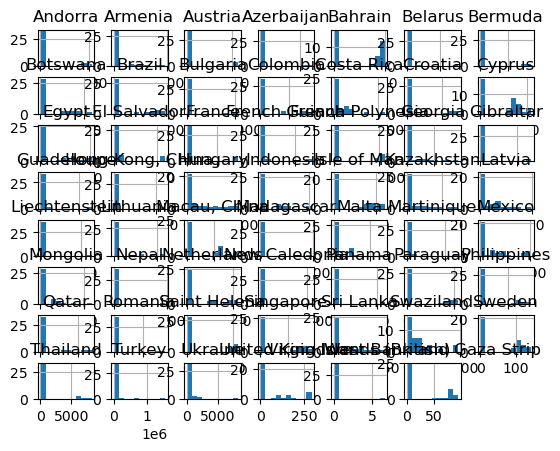

In [28]:
wages_men_pivoted.fillna(0).hist()
plt.legend(loc = 'upper left', fontsize = 6)

In [30]:
wages_men_pivoted

Country or Area,Andorra,Armenia,Austria,Azerbaijan,Bahrain,Belarus,Bermuda,Botswana,Brazil,Bulgaria,...,Singapore,Sri Lanka,Swaziland,Sweden,Thailand,Turkey,Ukraine,United Kingdom,Virgin Islands (British),West Bank and Gaza Strip
Year,,,,,,,,,,,,,,,,,,,,,
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,115.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,114.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,112.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,237.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,277.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
wages_total_2001 = wages_total[wages_total['Year']=='2001']

In [110]:
wages_total_2001['paid_by']=wages_total_2001['Scope'].str.split(' ').str[-1]

/tmp/ipykernel_75546/3949479969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wages_total_2001['paid_by']=wages_total_2001['Scope'].str.split(' ').str[-1]


In [111]:
wages_total_2001_monthly = wages_total_2001[wages_total_2001['paid_by']=='month']

<Axes: >

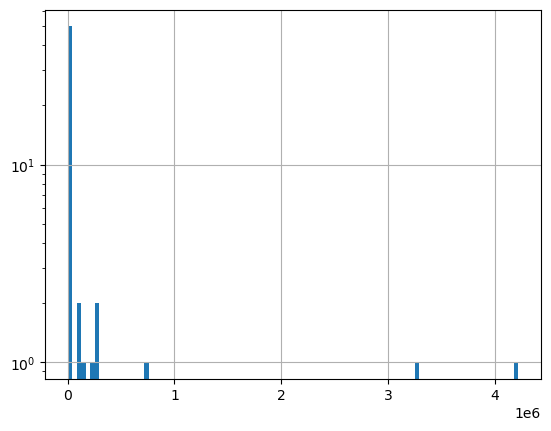

In [117]:
wages_total_2001_monthly['Value'].hist(log = True, bins=100)

Heavily skewed data set. Even in log scale. 


Wide disparity in monthly wages across countries in the dataset.

/home/prahlad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


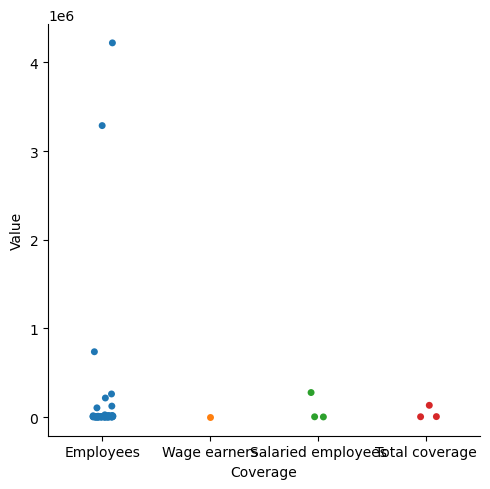

In [121]:
sns.catplot(wages_total_2001_monthly,x='Coverage', y = 'Value', hue = 'Coverage')

<Axes: title={'center': 'Value'}, xlabel='Coverage'>

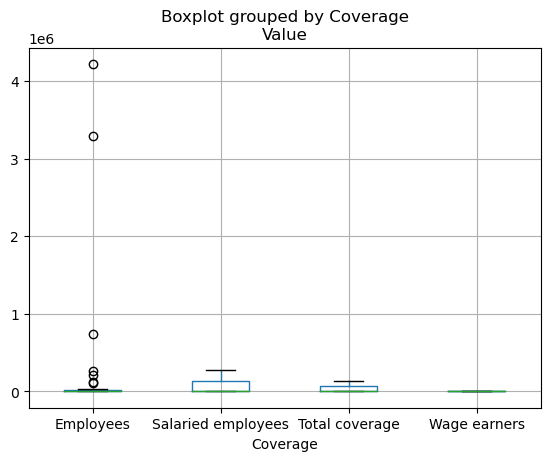

In [120]:
wages_total_2001_monthly.boxplot(by='Coverage', column = ['Value'] )